Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Navigating to data dir

In [2]:
import os
os.chdir("/content/drive/My Drive/NLP/")

Importing required libraries

In [3]:
import pandas as pd
import numpy as np

Reading data into dataframe

In [4]:
math_problems = pd.read_csv("all_data.csv")

In [5]:
math_problems.head()

,problem,level,type,modified_problem,no_of_equations,no_of_variables,has_exp_or_mod,has_logarithm,has_fraction,has_eq_or_neq,...,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X
0,"The graphs of four functions, labelled (2) thr...",Level 5,Algebra,"The graphs of four functions, labelled (2) thr...",1,0,False,False,False,False,...,16,8,0,1,19,117,1,3,8,13
1,If each of the variables represents a differen...,Level 3,Algebra,If each of the variables represents a differen...,1,4,False,False,True,False,...,7,2,0,3,7,29,1,0,2,6
2,What is the value of $a$ if the lines $2y - 2a...,Level 4,Algebra,What is the value of if the lines and are p...,2,3,False,False,True,True,...,2,0,0,1,0,1,1,0,0,0
3,Define $\#N$ by the formula $\#N = .5(N) + 1$....,Level 3,Algebra,Define by the formula . Calculate .,3,1,False,False,False,True,...,1,0,0,0,0,2,0,0,2,0
4,What is the midpoint of the segment with endpo...,Level 2,Algebra,What is the midpoint of the segment with endpo...,0,0,False,False,False,False,...,3,1,0,1,1,5,0,0,0,0


In [8]:
math_problems.shape

(4236, 50)

Dropping unnecessary columns

In [7]:
math_problems.drop(columns=["problem", "modified_problem"], inplace=True)

Lable encoding type column

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
math_problems['type'] = le.fit_transform(math_problems['type'])

Separating target attribute and input data

In [12]:
Y = math_problems["level"]
X = math_problems.drop(columns=['level'])

Dropping zero variance columns

In [13]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
X = selector.fit_transform(X)

In [ ]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names (column names)
selected_feature_names = [feature_name for i, feature_name in enumerate(input_features) if i in selected_feature_indices]

print(selected_feature_names)

['no_of_equations', 'sentence_count', 'word_count', 'words_per_sentence', 'average_word_length', 'large_words', 'has_repeated_large_words', 'CARDINAL', 'DATE', 'FAC', 'GPE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']


In [14]:
print(len(math_problems.columns), len(X[0]))

50 48


Spectral clustering

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

results = []
silhouette_scores = []

# Apply spectral clustering
n_clusters_range = [2,3,4,5]
for n_clusters in n_clusters_range:
  spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf')
  labels = spectral_clustering.fit_predict(X)
  results.append(labels)
  score = silhouette_score(X, labels)
  silhouette_scores.append(score)

# Find the optimal number of clusters
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 547 with accuracies 
[1.45372944e-15 2.94867207e-05 2.31313003e-05 2.31711426e-05]
not reaching the requested tolerance 2.434849739074707e-05.
Use iteration 547 instead with accuracy 
1.8947290902757117e-05.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.59137481e-15 2.94867208e-05 2.31312998e-05 2.31711430e-05]
not reaching the requested tolerance 2.434849739074707e-05.
  _, 

Optimal number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 555 with accuracies 
[9.13175013e-16 1.88051277e-05 3.18211258e-05 4.10078144e-05
 1.79345695e-05 2.34738711e-05]
not reaching the requested tolerance 2.434849739074707e-05.
Use iteration 555 instead with accuracy 
2.2173751434805773e-05.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.62756688e-15 1.88051274e-05 3.18211258e-05 4.10078122e-05
 1.79345751e-05 2.34738710e-05]
not reaching the requested tolerance 2.434849739074707e-05.
  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  est = KMeans(


In [ ]:
results

[array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 2, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 2, 0, ..., 0, 0, 0], dtype=int32),
 array([4, 2, 4, ..., 4, 4, 4], dtype=int32)]

Visualize using t-SNe plot

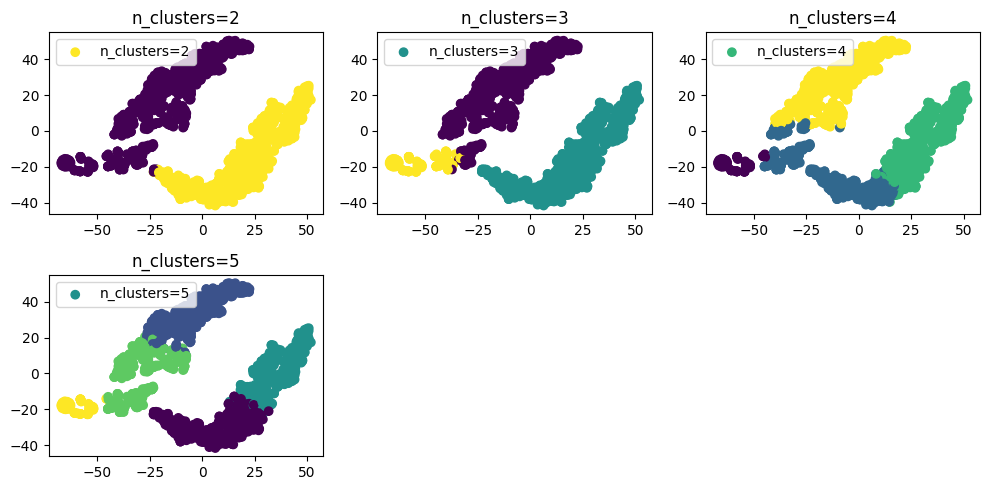

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Visualize t-SNE plot
plt.figure(figsize=(10, 5))
for i, labels in enumerate(results):
    tsne = TSNE(n_components=2, random_state=0)
    X_embedded = tsne.fit_transform(X)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', label=f'n_clusters={n_clusters_range[i]}')
    plt.title(f'n_clusters={n_clusters_range[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

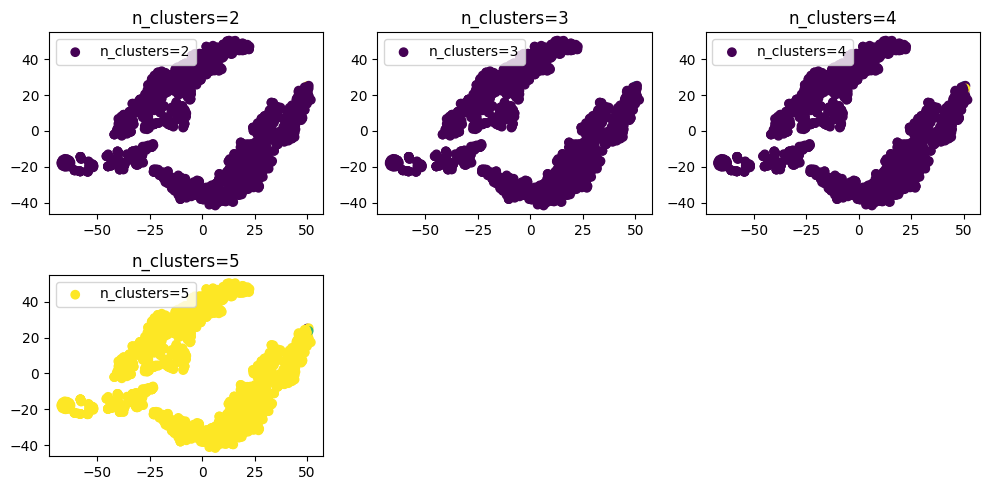

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Visualize t-SNE plot
plt.figure(figsize=(10, 5))
for i, labels in enumerate(results):
    tsne = TSNE(n_components=2, random_state=0)
    X_embedded = tsne.fit_transform(X)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', label=f'n_clusters={n_clusters_range[i]}')
    plt.title(f'n_clusters={n_clusters_range[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
math_problems['cluster_labels'] = results[1]

In [ ]:
distrib = pd.crosstab(math_problems['level'], math_problems['cluster_labels'])

In [ ]:
distrib

cluster_labels,0,1,2
level,,,
Level 1,175,0,0
Level 2,321,0,0
Level 3,372,0,0
Level 4,373,0,0
Level 5,391,1,1


Scree plot

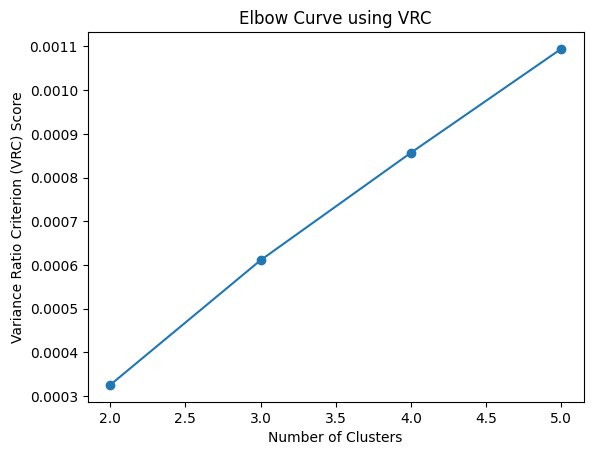

In [ ]:
# Set the range of n_clusters values
n_clusters_range = range(2, 6)

# Compute VRC for each n_clusters value
vrc_scores = []
for n_clusters in n_clusters_range:
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    labels = spectral_clustering.fit_predict(X)
    cluster_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

    # Calculate between-cluster variance
    between_variance = np.sum(np.linalg.norm(cluster_centers - np.mean(X, axis=0))**2)

    # Calculate within-cluster variance
    within_variance = np.sum([np.sum(np.linalg.norm(X[labels == i] - cluster_centers[i])**2) for i in range(n_clusters)])

    # Calculate VRC score
    vrc = between_variance / within_variance
    vrc_scores.append(vrc)

# Plot the Elbow Curve
plt.plot(n_clusters_range, vrc_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Ratio Criterion (VRC) Score')
plt.title('Elbow Curve using VRC')
plt.show()

In [ ]:
filtered_X = np.load("/content/filtered_X.npy")

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

results1 = []
# silhouette_scores = []

# Apply spectral clustering
n_clusters_range = [2,3,4,5]
for n_clusters in n_clusters_range:
  spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', eigen_tol=1e-6)
  labels = spectral_clustering.fit_predict(filtered_X)
  results1.append(labels)
  # score = silhouette_score(filtered_X, labels)
  # silhouette_scores.append(score)

# Find the optimal number of clusters
# optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
# print("Optimal number of clusters:", optimal_n_clusters)

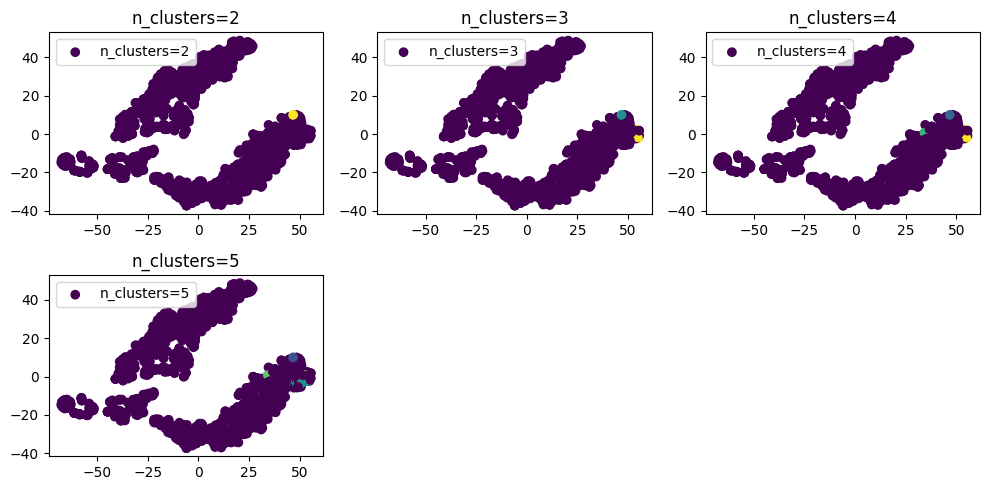

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Visualize t-SNE plot
plt.figure(figsize=(10, 5))
for i, labels in enumerate(results1):
    tsne = TSNE(n_components=2, random_state=0)
    X_embedded = tsne.fit_transform(filtered_X)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', label=f'n_clusters={n_clusters_range[i]}')
    plt.title(f'n_clusters={n_clusters_range[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

kmeans clustering

In [ ]:
from sklearn.cluster import KMeans

# Define the range of k values to evaluate
k_values = range(2, 6)

distortions = []
results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50)
    kmeans.fit(X)
    results.append(kmeans.labels_)
    distortion = kmeans.inertia_
    distortions.append(distortion)

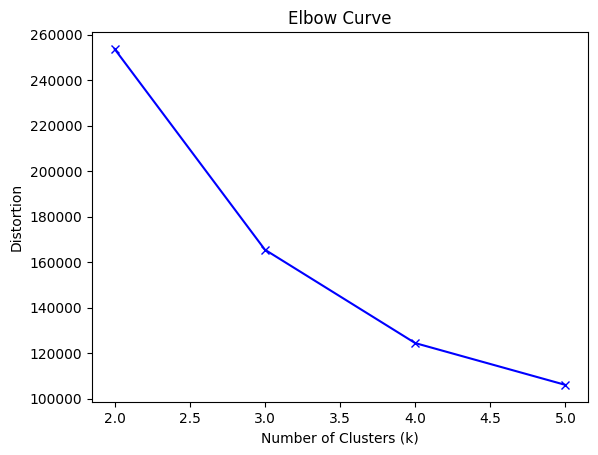

In [ ]:
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

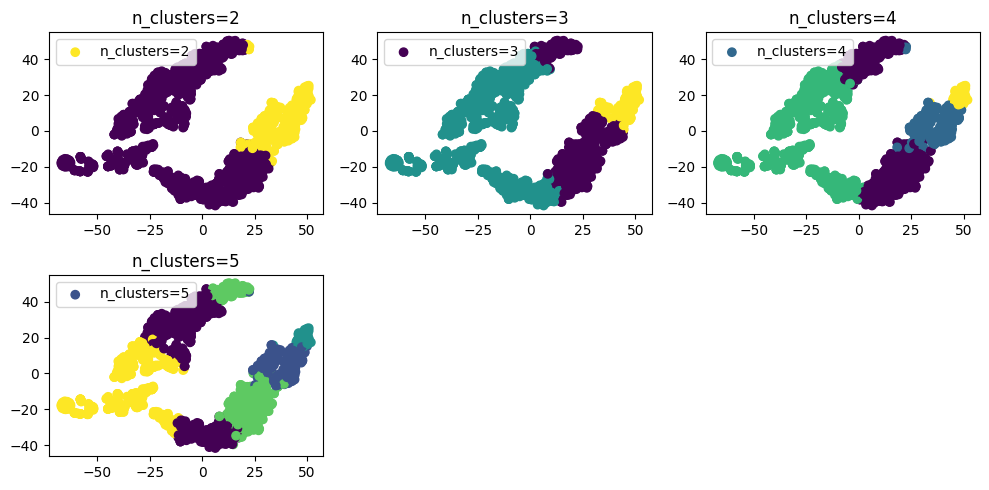

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Visualize t-SNE plot
plt.figure(figsize=(10, 5))
for i, labels in enumerate(results):
    tsne = TSNE(n_components=2, random_state=0)
    X_embedded = tsne.fit_transform(X)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', label=f'n_clusters={n_clusters_range[i]}')
    plt.title(f'n_clusters={n_clusters_range[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
math_problems['cluster_labels'] = results[1]
distrib = pd.crosstab(math_problems['level'], math_problems['cluster_labels'])

In [ ]:
distrib

cluster_labels,0,1,2
level,,,
Level 1,42,128,5
Level 2,100,204,17
Level 3,109,238,25
Level 4,116,212,45
Level 5,167,172,54


In [15]:
n_clusters = 3  # Number of clusters
affinity = 'nearest_neighbors'
random_state = 0  # Random seed for reproducibility

In [24]:
def run_spectral_clustering(data):
    # Perform spectral clustering
    clustering = SpectralClustering(n_clusters=n_clusters, affinity=affinity)
    labels = clustering.fit_predict(data)
    return labels

In [26]:
from sklearn.cluster import SpectralClustering
num_runs = 10  # Number of runs
all_labels = []
for _ in range(num_runs):
    perturbed_data = X + np.random.normal(scale=0.01, size=X.shape)  # Perturb the data
    labels = run_spectral_clustering(perturbed_data)
    all_labels.append(labels)

In [27]:
from sklearn.metrics import adjusted_rand_score
ari_scores = []
for i in range(num_runs):
    for j in range(i + 1, num_runs):
        ari = adjusted_rand_score(all_labels[i], all_labels[j])
        ari_scores.append(ari)

average_ari = np.mean(ari_scores)
print("Average ARI:", average_ari)

Average ARI: 0.9968584201213506


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Set the number of clusters for k-means
n_clusters = 3

cluster_labels = []
all_labels = []
num_runs = 10
for _ in range(num_runs):
    perturbed_data = X + np.random.normal(scale=0.01, size=X.shape)  # Perturb the data
    labels = kmeans.fit_predict(perturbed_data)
    cluster_labels.append(labels)

# Calculate similarity scores (ARI) between clusters
ari_scores = []
for i in range(len(cluster_labels)):
    for j in range(i+1, len(cluster_labels)):
        ari = adjusted_rand_score(cluster_labels[i], cluster_labels[j])
        ari_scores.append(ari)

# Assess cluster stability using the similarity scores
average_ari = np.mean(ari_scores)
print("Average ARI:", average_ari)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Average ARI: 1.0
